Sources

[Sk Fuzzy for air conditionar system](https://github.com/mdmamunhasan/fuzzy-logic-ac-controller/blob/main/main.py) <br>
[Youtube SK Fuzzy for Temp](https://www.youtube.com/watch?v=vG6aZEgbAVU&ab_channel=realknowsengineering) <br>
[Air Conditionar system](https://www.youtube.com/watch?v=PrCisna9LlI&ab_channel=CodeSelfie) <br>
[Sci-Kit Fuzzy Examples](https://scikit-fuzzy.readthedocs.io/en/latest/auto_examples/) <br>
[Fuzzy Logic Examples](https://github.com/caigen/scikit-fuzzy-examples)

In [19]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Input Variables

x_UT = np.arange(20, 32, 0.1)
x_Tdiff = np.arange(-3, 6, 0.01)
x_Td = np.arange(5, 20, 0.1)
x_EV = np.arange(100, 280, 0.1)

# Output Variables

x_SC = np.arange(-10, 110, 0.1)
x_FC = np.arange(-10, 110, 0.1)
x_Mo = np.arange(-0.5, 1.5, 0.001)
x_Fn = np.arange(0, 100, 0.1)


In [30]:
# Fuzzy membership functions - INPUT

UT_low = fuzz.trapmf(x_UT, [0, 0, 22, 25])
UT_opt = fuzz.trimf(x_UT, [22, 25, 28])
UT_high = fuzz.trapmf(x_UT, [25, 28, 30, 30])

Tdiff_negative = fuzz.trapmf(x_Tdiff, [-1, -1, -0.5, 0])
Tdiff_zero = fuzz.trimf(x_Tdiff, [-0.5, 0, 0.5])
Tdiff_positive = fuzz.trimf(x_Tdiff, [0, 1, 2])
Tdiff_large = fuzz.trapmf(x_Tdiff, [2, 2, 3, 3])

Td_optimal = fuzz.trapmf(x_Td, [10, 10, 11, 14])
Td_humid = fuzz.trapmf(x_Td, [12, 14, 18, 18])

EV_low = fuzz.trapmf(x_EV, [130, 130, 160, 180])
EV_regular = fuzz.trapmf(x_EV, [170, 190, 220, 220])

In [31]:
# Fuzzy membership functions - OUTPUT

SC_low = fuzz.trapmf(x_SC, [0, 0, 30, 50])
SC_med = fuzz.trapmf(x_SC, [40, 60, 60, 80])
SC_fast = fuzz.trapmf(x_SC, [70, 90, 100, 100])

FC_low = fuzz.trapmf(x_FC, [0, 0, 30, 50])
FC_med = fuzz.trimf(x_FC, [40, 60, 80])
FC_fast = fuzz.trapmf(x_FC, [70, 90, 100, 100])

Mo_ac = fuzz.trimf(x_Mo, [0, 1, 1])
Mo_de = fuzz.trimf(x_Mo, [0, 0, 1])

FN_aw = fuzz.trapmf(x_Fn, [25, 75, 99, 99])
FN_tw = fuzz.trapmf(x_Fn, [0, 0, 25, 75])

output_membership_functions = (SC_low, SC_med, SC_fast, FC_low, FC_med, FC_fast, Mo_ac, Mo_de, FN_aw, FN_tw)

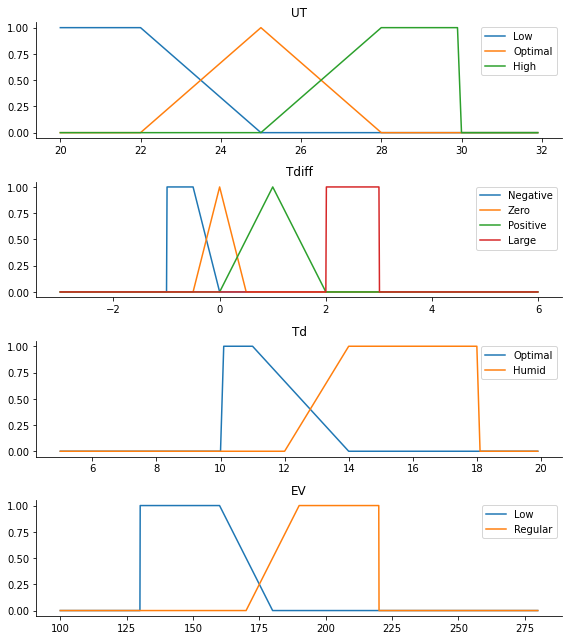

In [32]:
# ---------- GRAPHICS ------------------------------------

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))

ax0.plot(x_UT, UT_low, label='Low')
ax0.plot(x_UT, UT_opt, label='Optimal')
ax0.plot(x_UT, UT_high, label='High')
ax0.set_title('UT')
ax0.legend()

ax1.plot(x_Tdiff, Tdiff_negative, label='Negative')
ax1.plot(x_Tdiff, Tdiff_zero, label='Zero')
ax1.plot(x_Tdiff, Tdiff_positive, label='Positive')
ax1.plot(x_Tdiff, Tdiff_large, label='Large')
ax1.set_title('Tdiff')
ax1.legend()

ax2.plot(x_Td, Td_optimal, label='Optimal')
ax2.plot(x_Td, Td_humid, label='Humid')
ax2.set_title('Td')
ax2.legend()

ax3.plot(x_EV, EV_low, label='Low')
ax3.plot(x_EV, EV_regular, label='Regular')
ax3.set_title('EV')
ax3.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

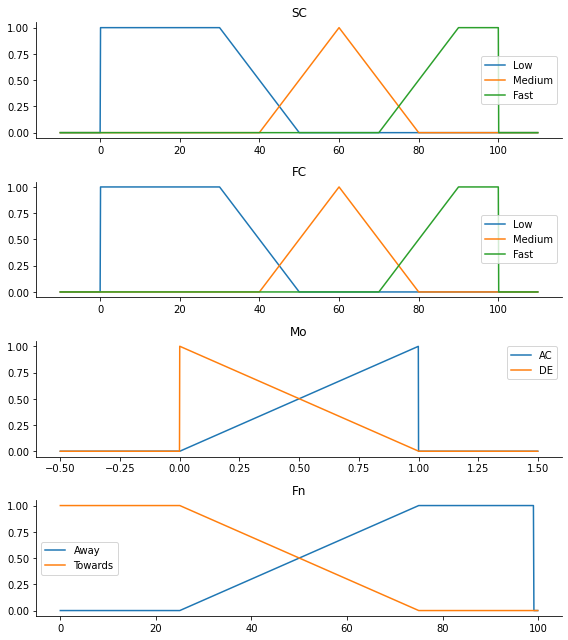

In [33]:

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))

ax0.plot(x_SC, SC_low, label='Low')
ax0.plot(x_SC, SC_med, label='Medium')
ax0.plot(x_SC, SC_fast, label='Fast')
ax0.set_title('SC')
ax0.legend()

ax1.plot(x_FC, FC_low, label='Low')
ax1.plot(x_FC, FC_med, label='Medium')
ax1.plot(x_FC, FC_fast, label='Fast')
ax1.set_title('FC')
ax1.legend()

ax2.plot(x_Mo, Mo_ac, label='AC')
ax2.plot(x_Mo, Mo_de, label='DE')
ax2.set_title('Mo')
ax2.legend()

ax3.plot(x_Fn, FN_aw, label='Away')
ax3.plot(x_Fn, FN_tw, label='Towards')
ax3.set_title('Fn')
ax3.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()



In [24]:
UT = 28
T_diff = 2.5
Td = 16
EV = 150

UT_level_low = fuzz.interp_membership(x_UT, UT_low, UT)
UT_level_opt = fuzz.interp_membership(x_UT, UT_opt, UT)
UT_level_high = fuzz.interp_membership(x_UT, UT_high, UT)

T_diff_level_negative = fuzz.interp_membership(x_Tdiff, Tdiff_negative, T_diff)
T_diff_level_zero = fuzz.interp_membership(x_Tdiff, Tdiff_zero, T_diff)
T_diff_level_positive = fuzz.interp_membership(x_Tdiff, Tdiff_positive, T_diff)
T_diff_level_large = fuzz.interp_membership(x_Tdiff, Tdiff_large, T_diff)

Td_level_optimal = fuzz.interp_membership(x_Td, Td_optimal, Td)
Td_level_humid = fuzz.interp_membership(x_Td, Td_humid, Td)

EV_level_low = fuzz.interp_membership(x_EV, EV_low, EV)
EV_level_regular = fuzz.interp_membership(x_EV, EV_regular, EV)


In [25]:
# Applying our rules and connecting the cases
active_rules = []
for Td_level in (Td_level_optimal, Td_level_humid):
    for EV_level in (EV_level_low, EV_level_regular):
        for T_diff_level in (T_diff_level_negative, T_diff_level_zero, T_diff_level_positive, T_diff_level_large):
            for UT_level in (UT_level_low, UT_level_opt, UT_level_high):
                active_rules.append(np.fmin(np.fmin(np.fmin(UT_level, T_diff_level), Td_level), EV_level))


In [26]:

all_output_activation_rules = []
tmp = []
for i in range(len(active_rules)):
    if 1 <= i <= 18 or 25 <= i <= 36 or 38 <= i <= 39:
        tmp.append(active_rules[i])
all_output_activation_rules.append(tmp)

tmp = []
for i in range(len(active_rules)):
    if 20 <= i <= 21 or 41 <= i <= 42 or i == 45:
        tmp.append(active_rules[i])
all_output_activation_rules.append(tmp)

tmp = []
for i in range(len(active_rules)):
    if i == 19 or 22 <= i <= 24 or i == 37 or i == 40 or 43 <= i <= 44 or 46 <= i <= 48:
        tmp.append(active_rules[i])
all_output_activation_rules.append(tmp)

tmp = []
for i in range(len(active_rules)):
    if 1 <= i <= 15 or i == 18 or 25 <= i <= 36 or 38 <= i <= 39:
        tmp.append(active_rules[i])
all_output_activation_rules.append(tmp)

tmp = []
for i in range(len(active_rules)):
    if i == 17 or i == 20 or i == 21 or i == 42:
        tmp.append(active_rules[i])
all_output_activation_rules.append(tmp)

tmp = []
for i in range(len(active_rules)):
    if i == 16 or i == 19 or 22 <= i <= 24 or i == 36 or 40 <= i <= 41 or 43 <= i <= 48:
        tmp.append(active_rules[i])
all_output_activation_rules.append(tmp)

tmp = []
for i in range(len(active_rules)):
    if not (36 <= i <= 42):
        tmp.append(active_rules[i])
all_output_activation_rules.append(tmp)

tmp = []
for i in range(len(active_rules)):
    if 36 <= i <= 42:
        tmp.append(active_rules[i])
all_output_activation_rules.append(tmp)

tmp = []
for i in range(len(active_rules)):
    if 1 <= i <= 15 or 18 == i or 25 <= i <= 36 or 38 <= i <= 39:
        tmp.append(active_rules[i])
all_output_activation_rules.append(tmp)

tmp = []
for i in range(len(active_rules)):
    if not (1 <= i <= 15 or 18 == i or 25 <= i <= 36 or 38 <= i <= 39):
        tmp.append(active_rules[i])
all_output_activation_rules.append(tmp)

activations = []
for output_activation_rules in all_output_activation_rules:
    tmp = output_activation_rules[0]
    for activation in output_activation_rules:
        tmp = np.fmax(tmp, activation)
    activations.append(np.fmin(tmp, output_membership_functions[len(activations)]))


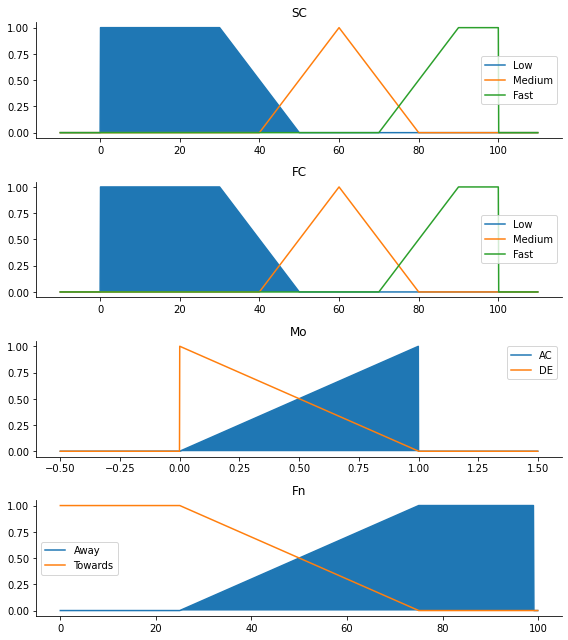

In [18]:

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))

zeros = np.zeros_like(x_SC)
ax0.fill_between(x_SC, zeros, activations[0])
ax0.plot(x_SC, SC_low, label='Low')
ax0.fill_between(x_SC, zeros, activations[1])
ax0.plot(x_SC, SC_med, label='Medium')
ax0.fill_between(x_SC, zeros, activations[2])
ax0.plot(x_SC, SC_fast, label='Fast')
ax0.set_title('SC')
ax0.legend()

zeros = np.zeros_like(x_FC)
ax1.fill_between(x_FC, zeros, activations[3])
ax1.plot(x_FC, FC_low, label='Low')
ax1.fill_between(x_FC, zeros, activations[4])
ax1.plot(x_FC, FC_med, label='Medium')
ax1.fill_between(x_FC, zeros, activations[5])
ax1.plot(x_FC, FC_fast, label='Fast')
ax1.set_title('FC')
ax1.legend()

zeros = np.zeros_like(x_Mo)
ax2.fill_between(x_Mo, zeros, activations[6])
ax2.plot(x_Mo, Mo_ac, label='AC')
ax2.fill_between(x_Mo, zeros, activations[7])
ax2.plot(x_Mo, Mo_de, label='DE')
ax2.set_title('Mo')
ax2.legend()

zeros = np.zeros_like(x_Fn)
ax3.fill_between(x_Fn, zeros, activations[8])
ax3.plot(x_Fn, FN_aw, label='Away')
ax3.fill_between(x_Fn, zeros, activations[9])
ax3.plot(x_Fn, FN_tw, label='Towards')
ax3.set_title('Fn')
ax3.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()
plt.show()


In [27]:
# Defuzzification using centroid method

aggregated_CS = np.fmax(np.fmax(activations[0], activations[1]), activations[2])
aggregated_FS = np.fmax(np.fmax(activations[3], activations[4]), activations[5])
aggregated_MO = np.fmax(activations[6], activations[7])
aggregated_FN = np.fmax(activations[8], activations[9])

CS = fuzz.defuzz(x_SC, aggregated_CS, 'centroid')
FS = fuzz.defuzz(x_FC, aggregated_FS, 'centroid')
MO = fuzz.defuzz(x_Mo, aggregated_MO, 'centroid')
FN = fuzz.defuzz(x_Fn, aggregated_FN, 'centroid')

In [28]:
print(CS)
print(FS)
print(MO)
print(FN)

20.442177722152795
20.442177722152795
0.6663333333333341
72.40132517838995
